## Personal Key Indicators of Heart Disease, an analysis

Heart disease is a leading cause of death in countries around the world. 

Research shows a number of comorbidities contribute to the risk of developing disease at all ages. 

Being able to predict the prevalence of heart disease will allow us to identify patients sooner and continue evolving from reactive medicine towards proactive intervention.

*Using this dataset, how accurately can we predict the prevalence of heart disease?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
sns.set_theme(style='whitegrid', palette='pastel')

In [3]:
data = pd.read_csv('../Capstone-Two/heartPHI2020.csv')
df = data.copy()
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
df.isna().sum()
# there are no null data

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.HeartDisease.value_counts()
# Far more No responses than Yes for HeartDisease

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Handling imbalanced data

After undersampling: Counter({'No': 27373, 'Yes': 27373})


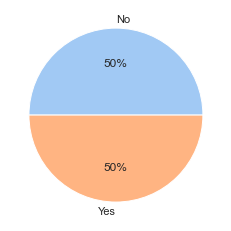

In [8]:
# Oversample and undersample and look at distributions.
# Undersample removes samples randomly from the majority class to make the distribution more equal
# As usual, X is all minus target variable
under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_under, y_under = under_sampler.fit_resample(X, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

After oversampling: Counter({'No': 292422, 'Yes': 292422})


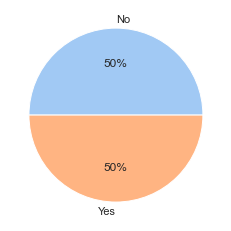

In [9]:
# oversampling randomly chooses and adds in samples from minority class to make distribution more equal
over_sampler = RandomOverSampler(sampling_strategy='minority', random_state=123)
X = df.iloc[:, 1:]
y = df['HeartDisease']
X_over, y_over = over_sampler.fit_resample(X, y)

print(f'After oversampling: {Counter(y_over)}')
plt.pie(y_over.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

In [10]:
X_under.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,54746.000000,54746,54746,54746,54746.000000,54746.000000,54746,54746,54746,54746,54746,54746,54746,54746.000000,54746,54746,54746
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,No,Yes,Good,NaN,No,No,No
freq,NaN,27923,51653,49659,NaN,NaN,41548,28918,7224,43328,41151,38974,17413,NaN,46308,50533,47412
mean,28.792460,NaN,NaN,NaN,5.371223,4.241771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.118164,NaN,NaN,NaN
std,6.470628,NaN,NaN,NaN,9.954864,8.553142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.597540,NaN,NaN,NaN
min,12.210000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,27.710000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,32.010000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [11]:
X_over.describe(include='all')

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,584844.000000,584844,584844,584844,584844.000000,584844.000000,584844,584844,584844,584844,584844,584844,584844,584844.000000,584844,584844,584844
unique,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,No,No,No,NaN,NaN,No,Male,70-74,White,No,Yes,Good,NaN,No,No,No
freq,NaN,297855,552085,530072,NaN,NaN,443255,308059,77870,463404,439062,417394,185962,NaN,494002,539414,506541
mean,28.808107,NaN,NaN,NaN,5.390971,4.240462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.115034,NaN,NaN,NaN
std,6.475100,NaN,NaN,NaN,9.969421,8.535121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.603945,NaN,NaN,NaN
min,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,24.390000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,27.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,32.080000,NaN,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [12]:
# will move forward with undersampled df and explore oversampled df model performance later
y_under = pd.DataFrame(y_under)
undersampled_df = y_under.merge(X_under, left_index=True, right_index=True)
df = undersampled_df

## Preprocessing

In [13]:
# people with MentalHealth or PhysicalHealth response of 0, 
# responded that they had mental and physical problems 0 out of the last 30 days
df[['SleepTime', 'PhysicalHealth', 'MentalHealth']] = df[['SleepTime', 'PhysicalHealth', 'MentalHealth']].astype(int)

In [14]:
# similar to this study - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4877313/
# will evaluate, BMI PhysicalHealth, MentalHealth, and SleepTime as both continuous and categorical variables
# they used these bins for SleepTime of ≤ 6 h, > 6 to < 9 h, ≥ 9 h
# MentalHealth and PhysicalHealth variables are responses to how many days in last 30-31 were bad for health
# binning them by week
# Underweight: Less than 18.5, Healthy: 18.5 to 24.9, Overweight: 25 to 29.9, Class I obesity: 30 to 34.9, Class II obesity: 35 to 39.9, Class III obesity: More than 40.

sleep_bins = [-np.inf, 5, 7, 9, np.inf]
sleep_labels = ['≤ 5', '> 5 to ≤ 7 h', '> 7 to ≤ 9 h', '> 9 h']
df['SleepTime_binned'] = pd.cut(df['SleepTime'], bins=sleep_bins, labels=sleep_labels)

bmi_bins = [-np.inf, 18.49, 24.9, 29.9, 34.9, 39.9, np.inf]
bmi_labels = ['Underweight','Healthy','Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']
df['BMI_binned'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

mental_bins = [-np.inf, 7, 14, 21, np.inf]
mental_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['MentalHealth_binned'] = pd.cut(df['MentalHealth'], bins=mental_bins, labels=mental_labels)

physical_bins = [-np.inf, 7, 14, 21, np.inf]
physical_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['PhysicalHealth_binned'] = pd.cut(df['PhysicalHealth'], bins=physical_bins, labels=physical_labels)

In [15]:
agecat_mean = {'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,'55-59':57, 
                    '60-64':62,'65-69':67,'70-74':72,'75-79':77,'80 or older':80}

df['Mean_Age'] = df['AgeCategory'].apply(lambda x: agecat_mean[x])
df.drop(columns=['AgeCategory'],inplace=True)

In [16]:
print(f'min BMI: {df["BMI"].min()}')
print(f'max BMI: {df["BMI"].max()}')

min BMI: 12.21
max BMI: 87.05


In [17]:
len(df)

54746

In [18]:
# people with MentalHealth or PhysicalHealth response of 0, 
# responded that they had mental and physical problems 0 out of the last 30 days
df[['SleepTime', 'PhysicalHealth', 'MentalHealth']] = df[['SleepTime', 'PhysicalHealth', 'MentalHealth']].astype(int)

## Exploratory Data Analysis

In [19]:
nunique = df.nunique().sort_values()
print('Number of Unique Values by Column' + '\n')
nunique

Number of Unique Values by Column



HeartDisease                2
Smoking                     2
AlcoholDrinking             2
Stroke                      2
SkinCancer                  2
DiffWalking                 2
Sex                         2
KidneyDisease               2
Asthma                      2
PhysicalActivity            2
MentalHealth_binned         4
SleepTime_binned            4
Diabetic                    4
PhysicalHealth_binned       4
GenHealth                   5
Race                        6
BMI_binned                  6
Mean_Age                   13
SleepTime                  22
MentalHealth               31
PhysicalHealth             31
BMI                      2525
dtype: int64

In [20]:
# unique values in column
columns = df.columns
print('List of Unique Values by Column' + '\n' + '\n')
for col in columns:
    print(f'{col}:  {str(df[col].unique())} \n')

List of Unique Values by Column


HeartDisease:  ['No' 'Yes'] 

BMI:  [34.87 28.89 25.68 ... 34.29 23.76 35.92] 

Smoking:  ['Yes' 'No'] 

AlcoholDrinking:  ['No' 'Yes'] 

Stroke:  ['No' 'Yes'] 

PhysicalHealth:  [ 0  1 30 20  5  2 10  3 14  6 15 16  4  7  8 25 28 13 21 29 12 24 17  9
 19 27 11 22 23 18 26] 

MentalHealth:  [ 0 10 30  1  2  3 20  4  6 15  7  5 12  8 14 29 25 17 28 21 13 27 22 18
  9 24 16 26 11 19 23] 

DiffWalking:  ['No' 'Yes'] 

Sex:  ['Male' 'Female'] 

Race:  ['White' 'Asian' 'Hispanic' 'Other' 'Black'
 'American Indian/Alaskan Native'] 

Diabetic:  ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity:  ['Yes' 'No'] 

GenHealth:  ['Very good' 'Excellent' 'Fair' 'Good' 'Poor'] 

SleepTime:  [ 5  7  6  8  4  9 10 12  3 11 15 14 24  2 13  1 16 18 17 20 19 22] 

Asthma:  ['No' 'Yes'] 

KidneyDisease:  ['No' 'Yes'] 

SkinCancer:  ['No' 'Yes'] 

SleepTime_binned:  ['≤ 5', '> 5 to ≤ 7 h', '> 7 to ≤ 9 h', '> 9 h']
Categories (4, object): ['≤ 

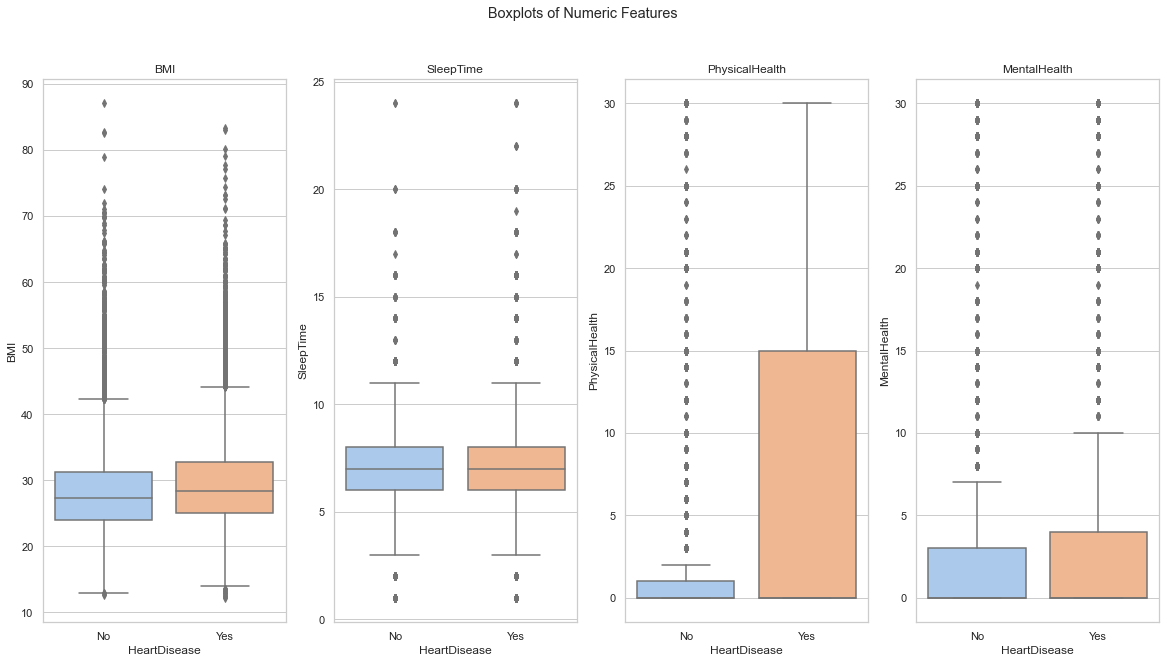

In [21]:
# box plots of numeric variables -- BMI, SleepTime, and time-bound categorical variables PhysicalHealth and MentalHealth
fig, ax = plt.subplots(1,4, figsize=(20,10))
plt.suptitle('Boxplots of Numeric Features')
sns.boxplot(x='HeartDisease',y='BMI', data=df, ax=ax[0])
ax[0].set_title('BMI')
sns.boxplot(x='HeartDisease',y='SleepTime', data=df, ax=ax[1])
ax[1].set_title('SleepTime')
sns.boxplot(x='HeartDisease',y='PhysicalHealth', data=df, ax=ax[2])
ax[2].set_title('PhysicalHealth')
sns.boxplot(x='HeartDisease',y='MentalHealth', data=df, ax=ax[3])
ax[3].set_title('MentalHealth')
plt.show()

There doesn't appear to be any null values or values that obviously do not belong. While the cutoff for type III obesity is 40, a BMI of 90 is plausible because it is the BMI of a person who weighs 400 lbs at 4 foot 8 or 657 lbs at 6 feet tall.

BMI = kg/(m^2)

The data are very unbalanced with a vast majority of instances reporting 'No' for our target feature, 'HeartDisease'.

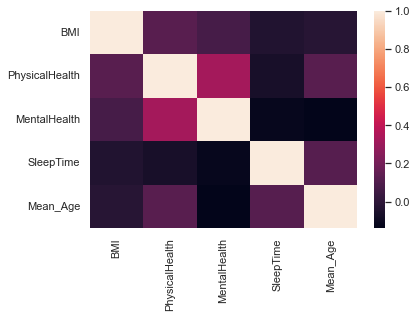

In [22]:
fig, ax = plt.subplots()
ax = sns.heatmap(df.corr())

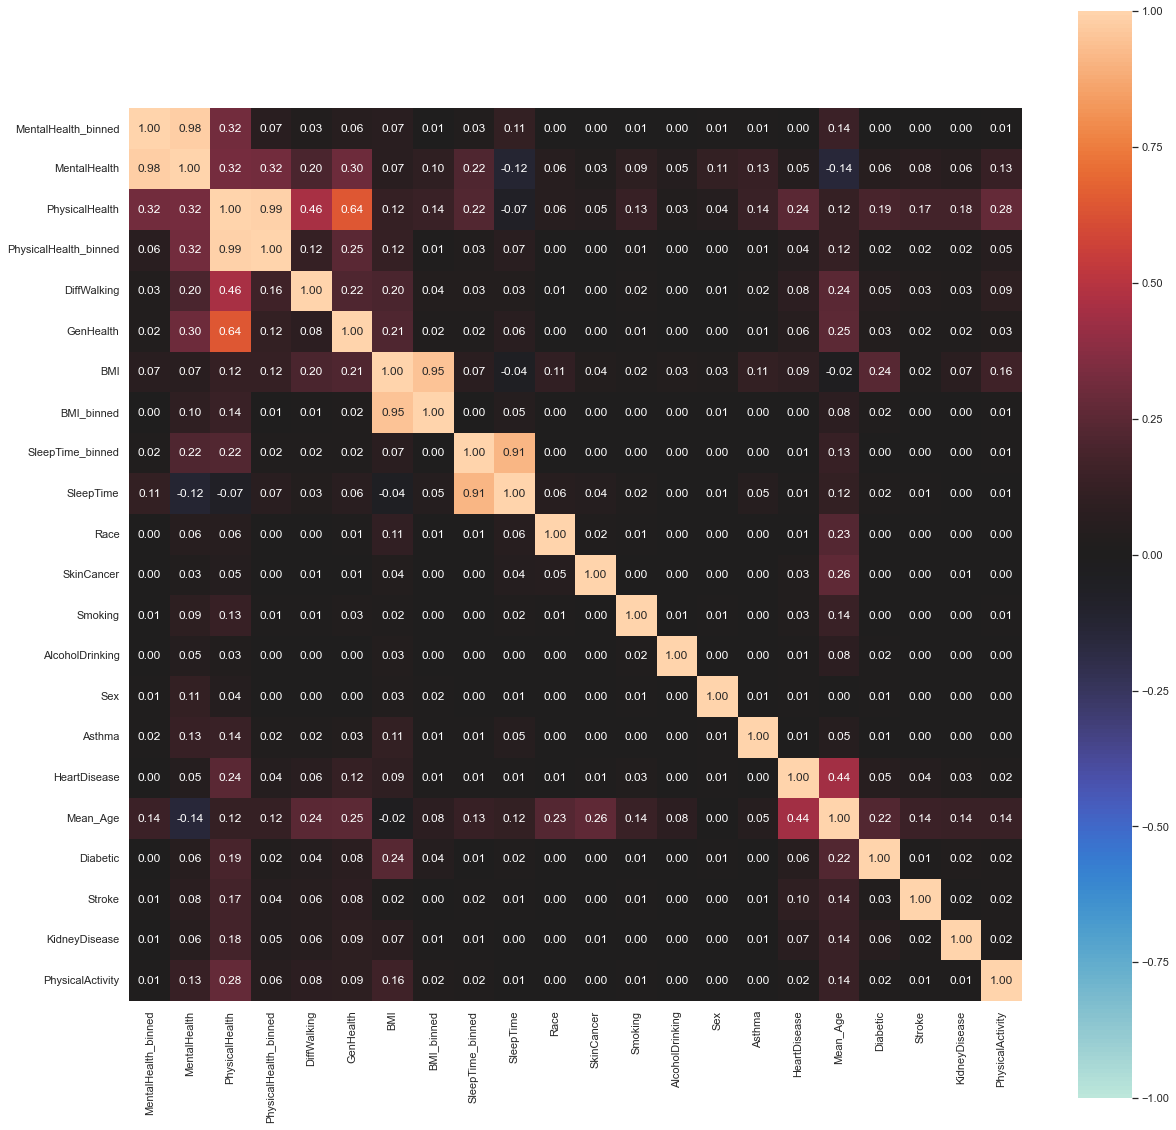

{'corr':                        MentalHealth_binned  MentalHealth  PhysicalHealth  \
 MentalHealth_binned               1.000000      0.981155        0.320235   
 MentalHealth                      0.981155      1.000000        0.323493   
 PhysicalHealth                    0.320235      0.323493        1.000000   
 PhysicalHealth_binned             0.062714      0.318944        0.986648   
 DiffWalking                       0.031043      0.196699        0.455663   
 GenHealth                         0.024597      0.297367        0.642834   
 BMI                               0.069094      0.069538        0.121185   
 BMI_binned                        0.002742      0.097781        0.137674   
 SleepTime_binned                  0.016930      0.216154        0.222520   
 SleepTime                         0.113252     -0.119339       -0.068301   
 Race                              0.002102      0.059830        0.058083   
 SkinCancer                        0.001436      0.030109        0.0

In [23]:
# make all categorical features type object to work with dython.nominal.associations
df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']] = \
                    df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']].astype(object)
# dython.nominal.associations easily displays correlation heatmap of categorical and numeric features
assoc = associations(df, nom_nom_assoc='theil', clustering=True, figsize=(20,20))
assoc

PhysicalHealth and MentalHealth are positively correlated, as is DiffWalking and PhysicalHealth, though with correlations under 0.5, likely not too correlated to cause an issue with modeling collinearly. 

GenHealth and PhysicalHealth are the most correlated column (other than features generated from other features). 
0.64 may be significant, may need to drop one of these columns to avoid issue.

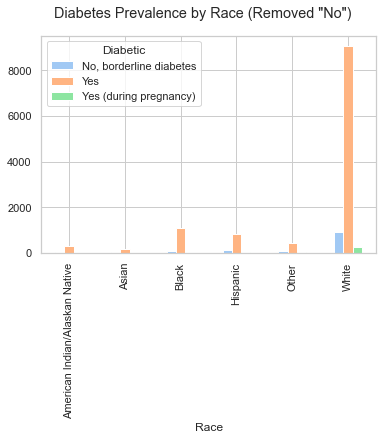

In [24]:
racediabetic = pd.crosstab(df['Race'], df['Diabetic'])
racediabetic = pd.DataFrame(racediabetic)
racediabetic[['No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']].plot(kind='bar')
plt.suptitle('Diabetes Prevalence by Race (Removed "No")')
plt.show()

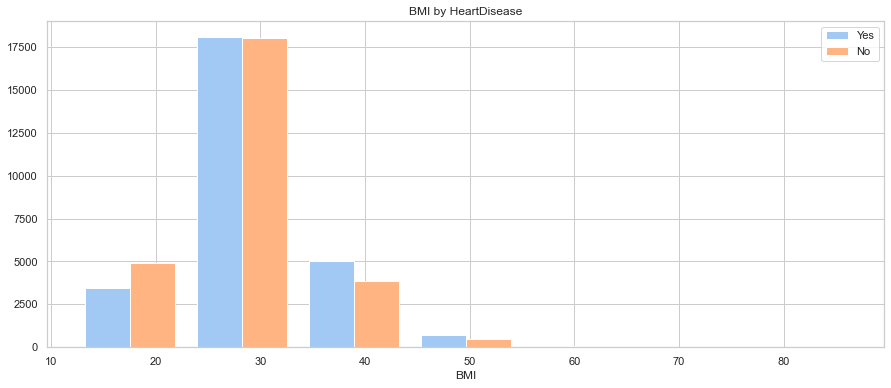

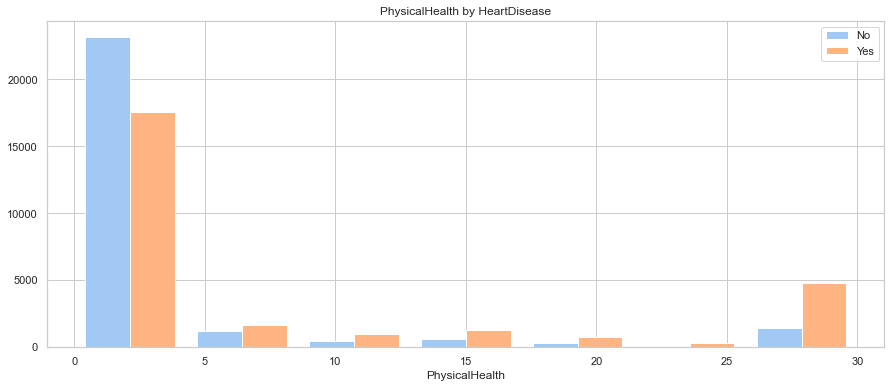

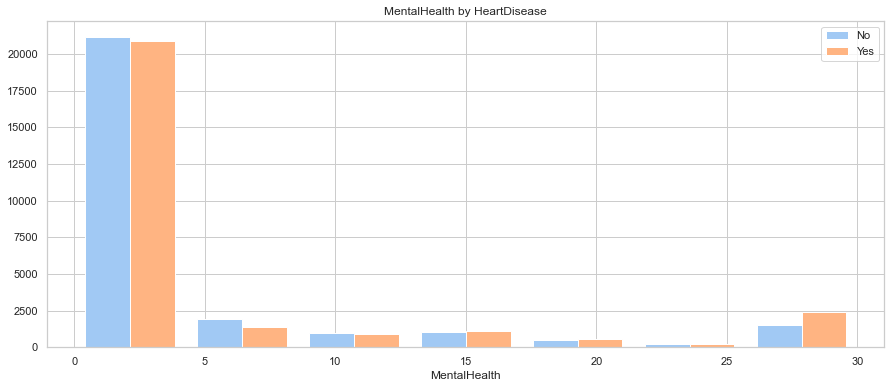

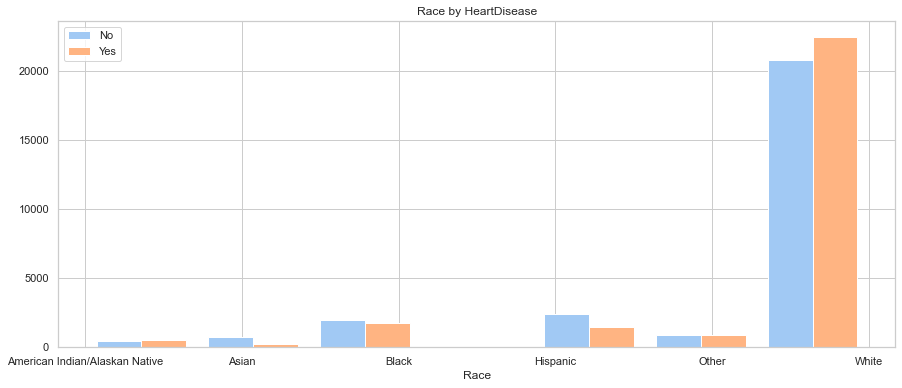

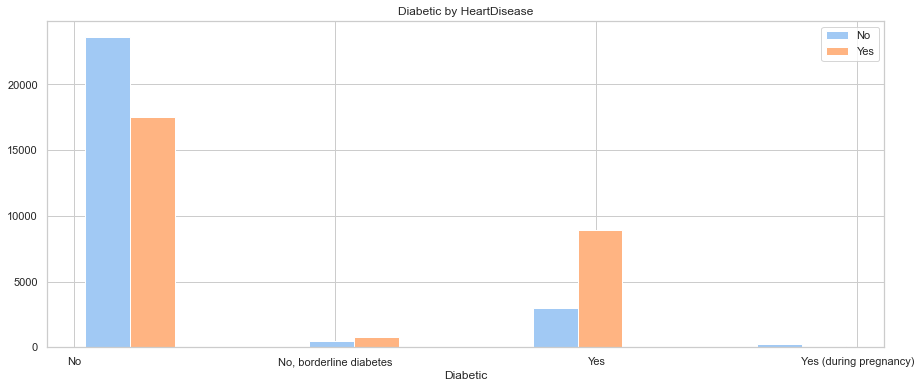

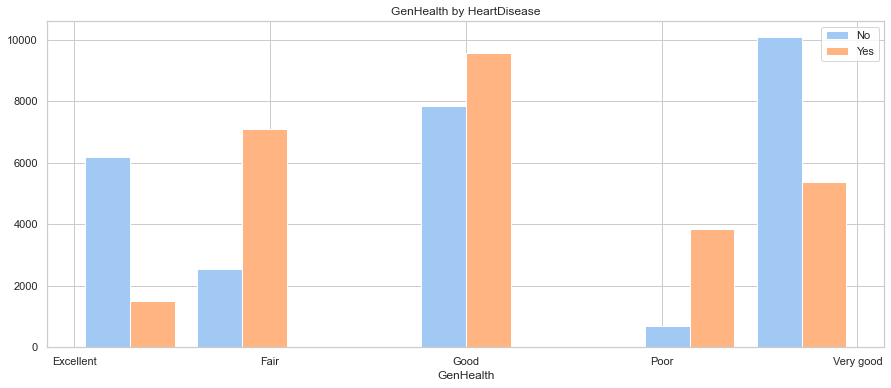

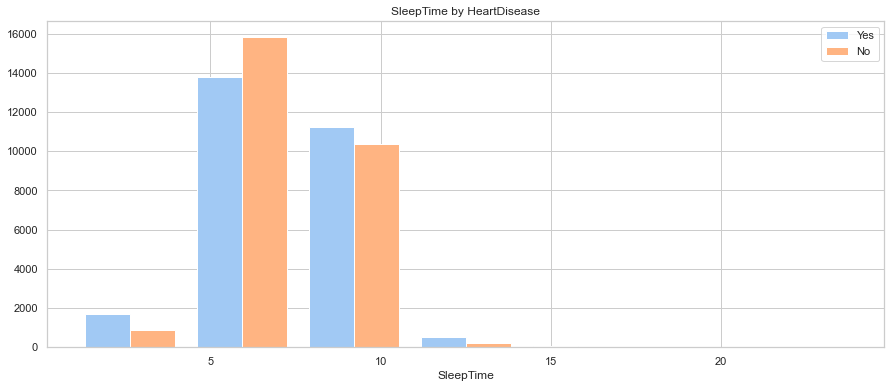

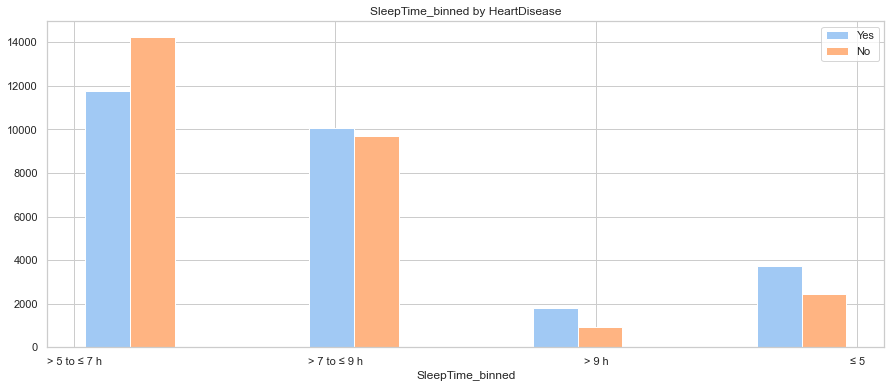

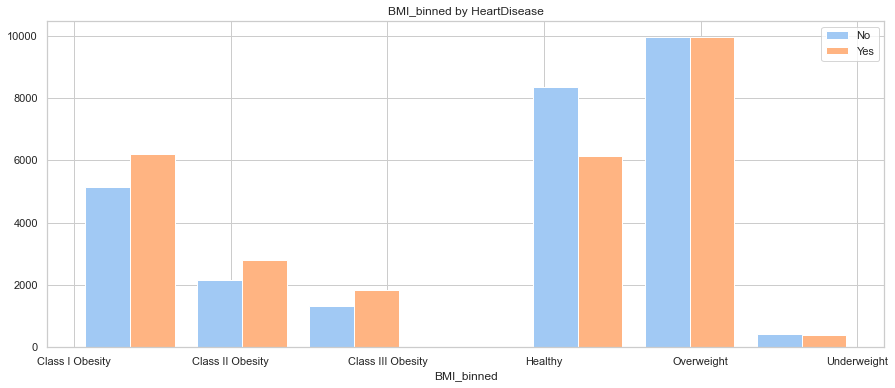

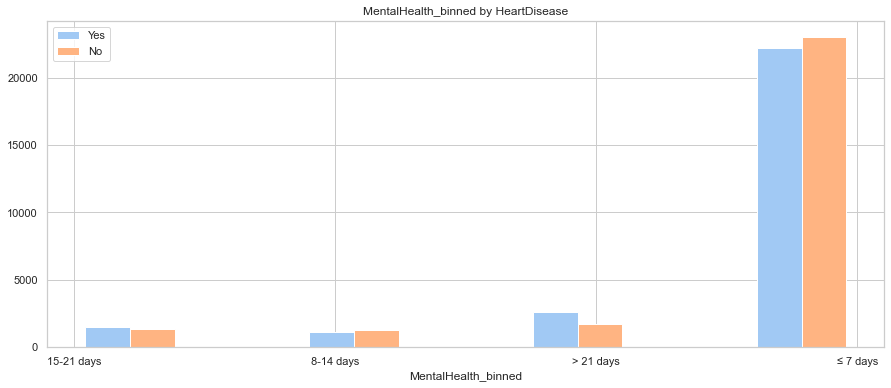

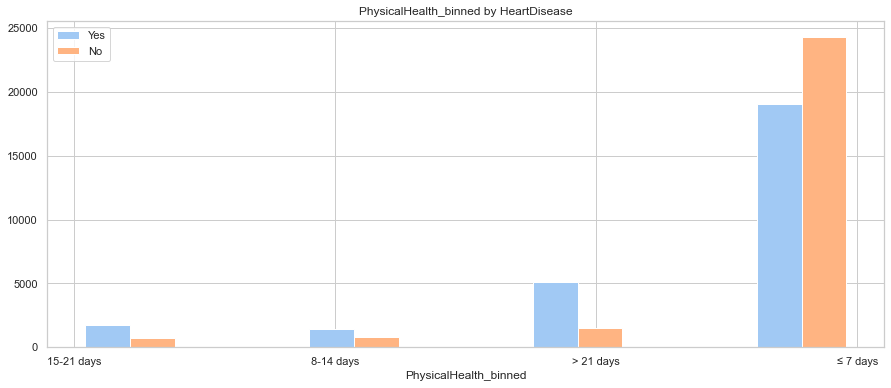

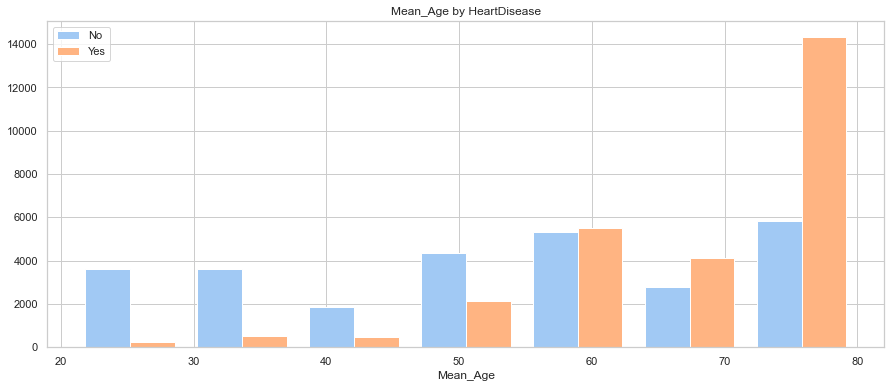

In [25]:
# distribution of features by HeartDisease
for col in df.columns:
    if df[col].nunique() > 2:
        data = df.sort_values(col)
        split_hist(data, col, split_by='HeartDisease', bins=7, figsize=(15,6))

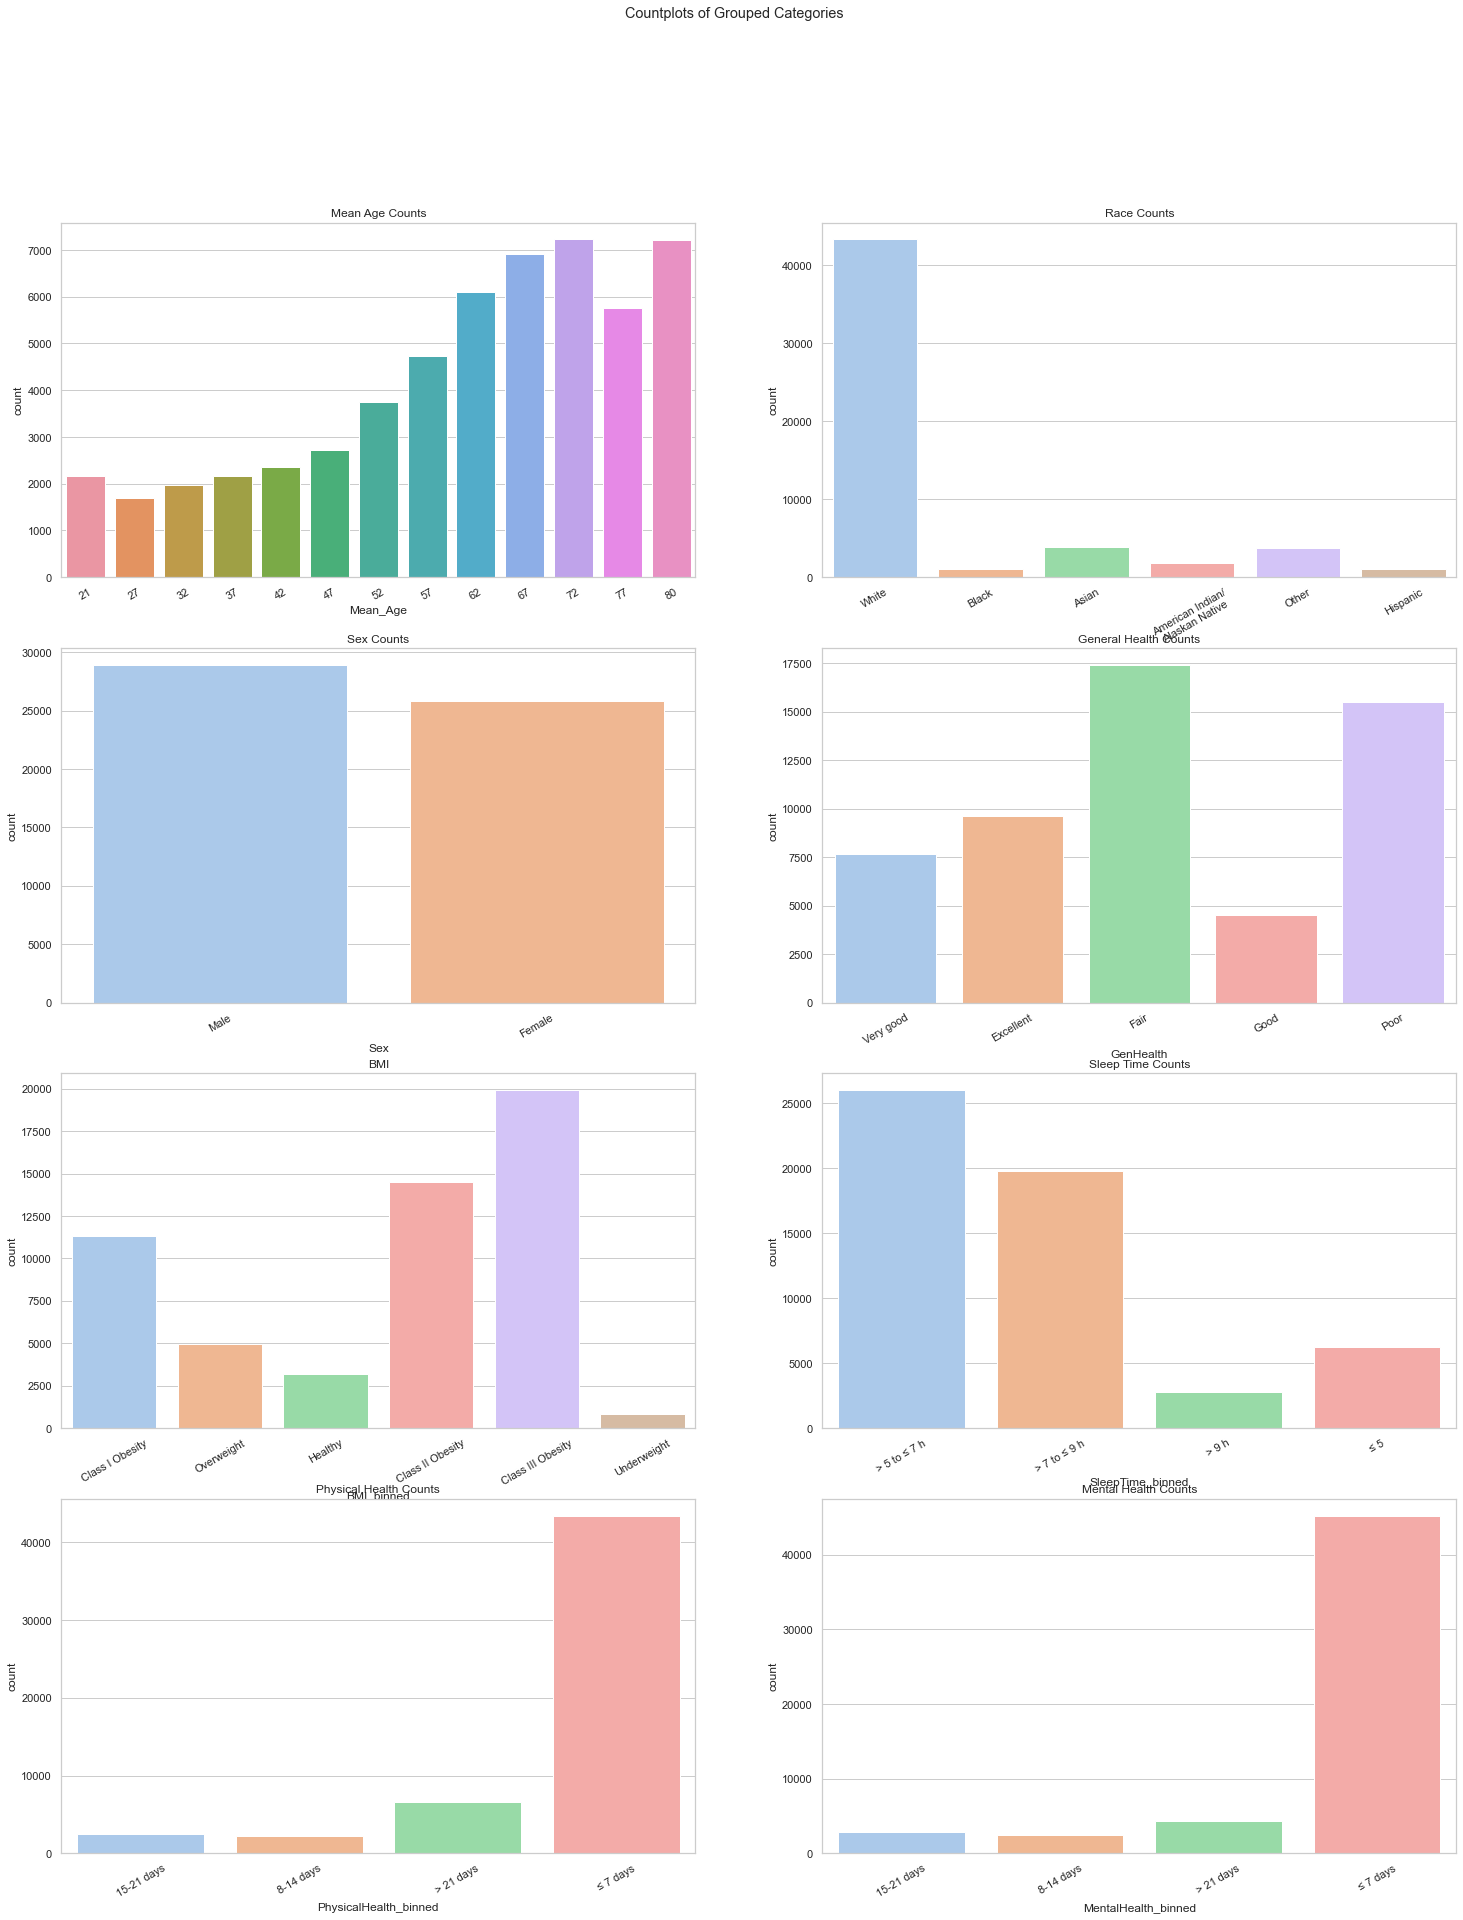

In [27]:
# binned countplots
fig, ax = plt.subplots(4, 2, figsize=(25,30))
plt.suptitle('Countplots of Grouped Categories \n \n \n')
           
age_dist = sns.countplot(x = df.sort_values('Mean_Age')['Mean_Age'], ax=ax[0][0])
age_dist.set_xticklabels(labels=df.sort_values('Mean_Age')['Mean_Age'].unique(), rotation=30)
age_dist.set_title('Mean Age Counts')

race_dist = sns.countplot(x = df['Race'], ax=ax[0][1])
race_dist.set_xticklabels(labels=['White', 'Black', 'Asian', 'American Indian/\nAlaskan Native','Other', 'Hispanic'], rotation=30) 
race_dist.set_title('Race Counts')

sex_dist = sns.countplot(x = df['Sex'], ax=ax[1][0])
sex_dist.set_xticklabels(labels=df['Sex'].unique(), rotation=30) 
sex_dist.set_title('Sex Counts')

genhealth_dist = sns.countplot(x = df.sort_values(by='GenHealth')['GenHealth'], ax=ax[1][1])
genhealth_dist.set_xticklabels(labels=df['GenHealth'].unique(), rotation=30)
genhealth_dist.set_title('General Health Counts')

bmibin_dist = sns.countplot(x = df.sort_values(by='BMI_binned')['BMI_binned'], ax=ax[2][0])
bmibin_dist.set_xticklabels(labels=df['BMI_binned'].unique(), rotation=30)
bmibin_dist.set_title('BMI')

sleepbin_dist = sns.countplot(x = df.sort_values(by='SleepTime_binned')['SleepTime_binned'], ax=ax[2][1])
sleepbin_dist.set_xticklabels(labels=df.sort_values(by='SleepTime_binned')['SleepTime_binned'].unique(), rotation=30)
sleepbin_dist.set_title('Sleep Time Counts')

physicalbin_dist = sns.countplot(x = df.sort_values(by='PhysicalHealth_binned')['PhysicalHealth_binned'], ax=ax[3][0])
physicalbin_dist.set_xticklabels(labels=df.sort_values(by='PhysicalHealth_binned')['PhysicalHealth_binned'].unique(), rotation=30)
physicalbin_dist.set_title('Physical Health Counts')

mentalbin_dist = sns.countplot(x = df.sort_values(by='MentalHealth_binned')['MentalHealth_binned'], ax=ax[3][1])
mentalbin_dist.set_xticklabels(labels=df.sort_values(by='MentalHealth_binned')['MentalHealth_binned'].unique(), rotation=30)
mentalbin_dist.set_title('Mental Health Counts')
plt.show()


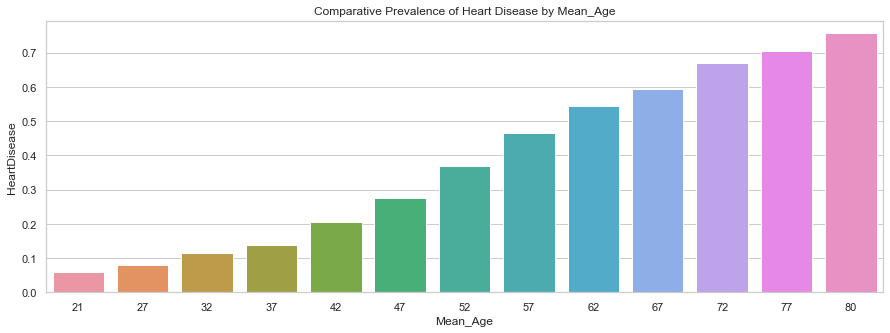

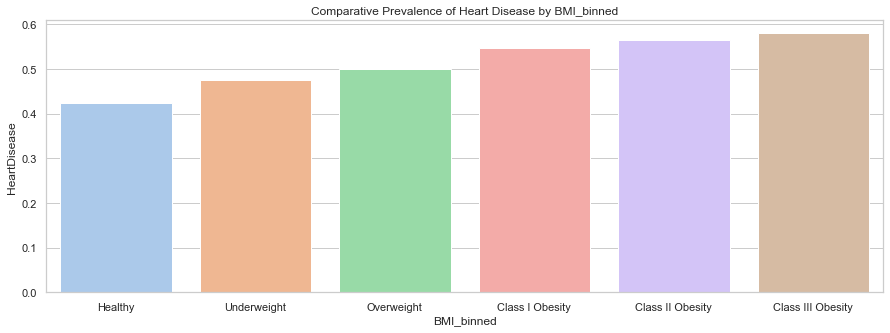

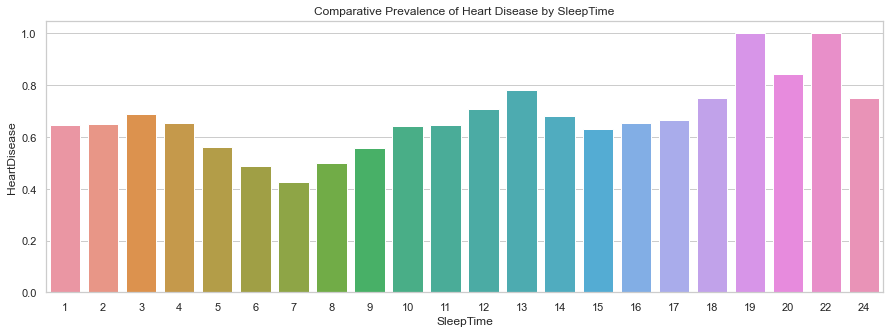

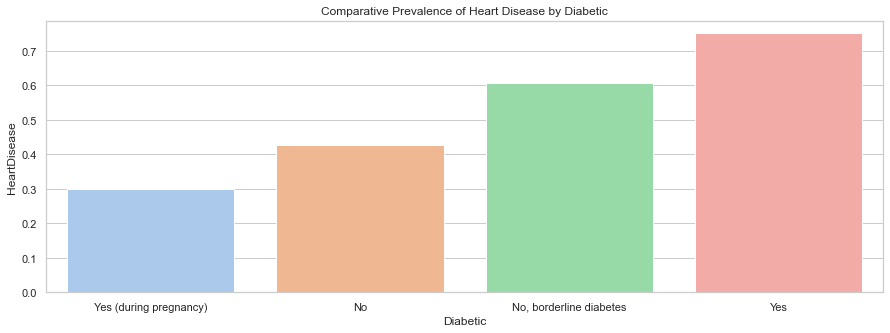

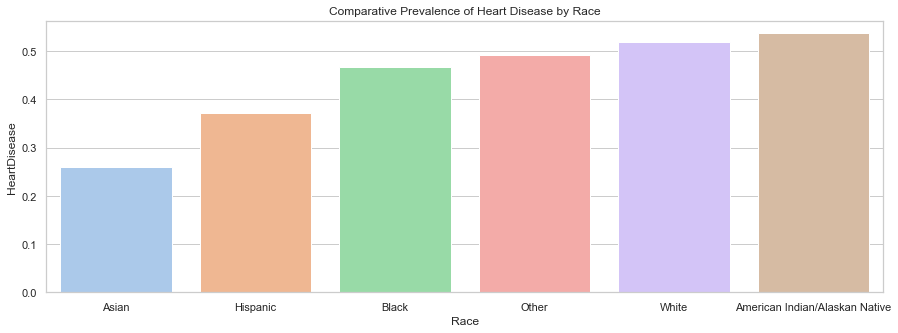

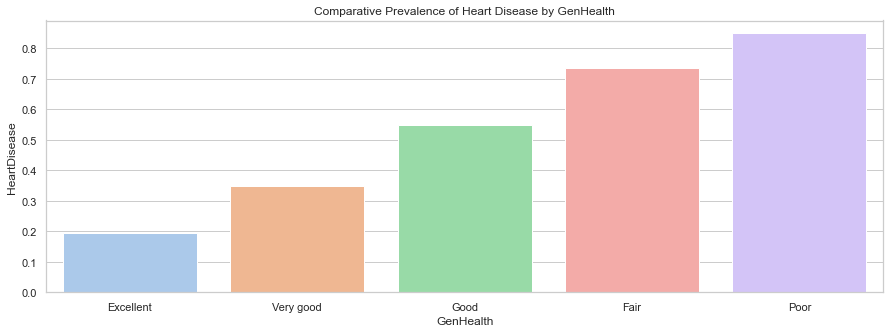

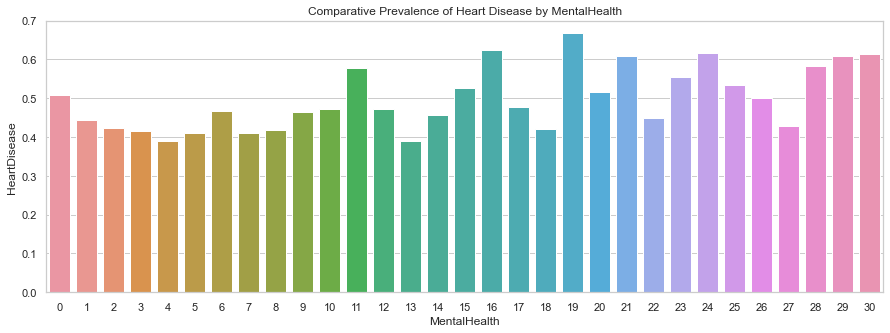

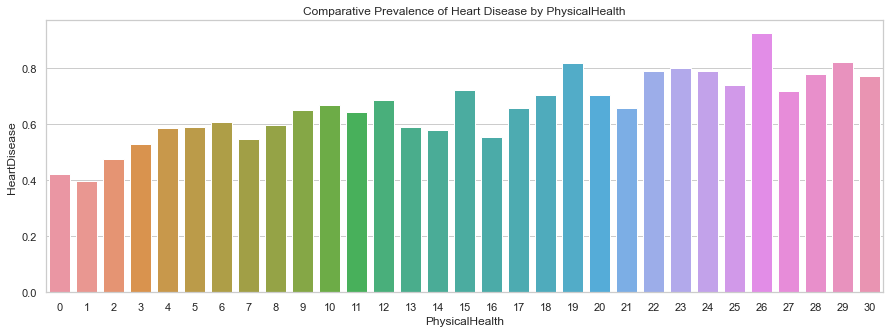

In [32]:
# find a way to loop through distributions
dummy_df=df.copy()
lencoder = LabelEncoder()
dummy_df['HeartDisease'] = lencoder.fit_transform(dummy_df['HeartDisease'])

columns = dummy_df[['Mean_Age', 'BMI_binned', 'SleepTime', 'Diabetic', 
                    'Race', 'GenHealth', 'MentalHealth', 'PhysicalHealth']]
for col in columns:
    fig, ax = plt.subplots(figsize = (15,5))
    d = dummy_df[['HeartDisease', col]].groupby([col],as_index=False).mean()
    sns.barplot(data=d.sort_values(by='HeartDisease'),x=col,y='HeartDisease')
    plt.title(f'Comparative Prevalence of Heart Disease by {col}')
    plt.show()

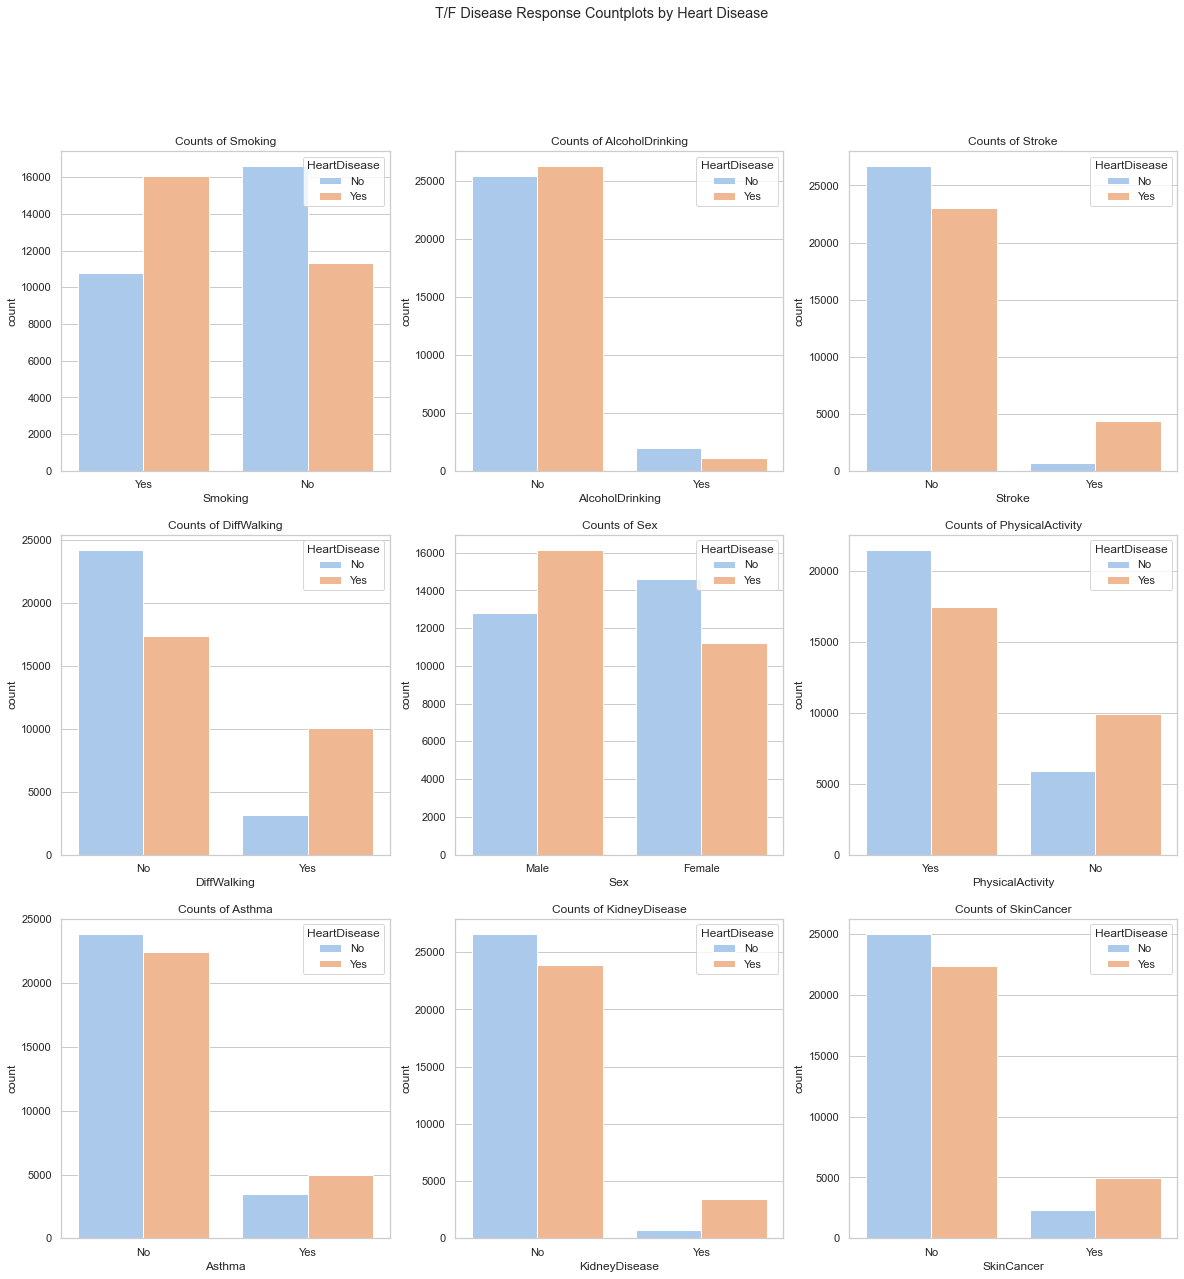

In [29]:
# Y/N countplots by HeartDisease
bool_cols = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]

def countplots(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    plt.suptitle("T/F Disease Response Countplots by Heart Disease")
    for row in range(3):
        for col in range(3):
            column = bool_cols[row][col]
            sns.countplot(x=df[column],ax=axes[row,col],hue=df['HeartDisease']).set(title="Counts of {}".format(column))

countplots(bool_cols)

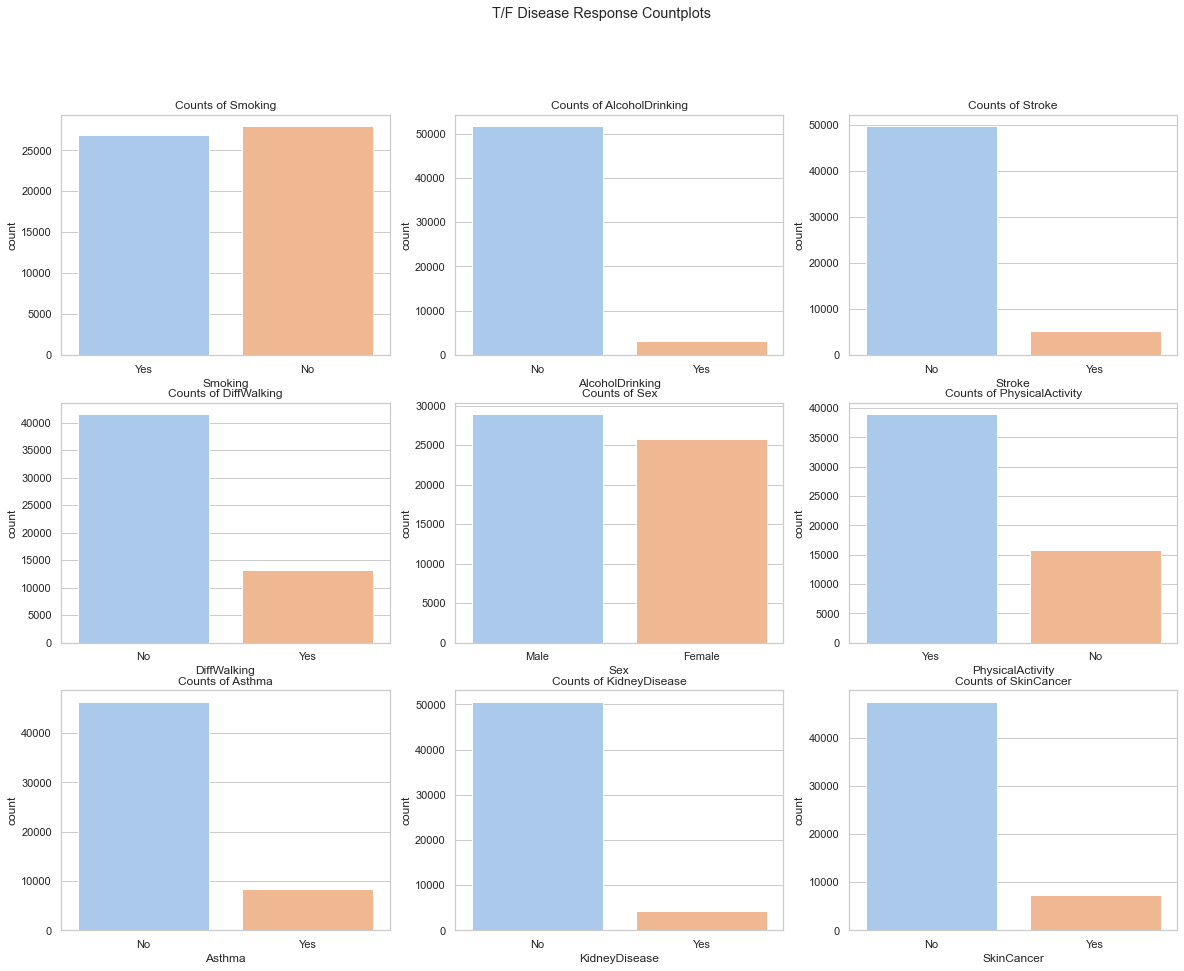

In [30]:
# Y/N countplots 
def counts(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle("T/F Disease Response Countplots")
    for row in range(3):
        for col in range(3):
            column = bool_cols[row][col]
            sns.countplot(x=df[column],ax=axes[row,col]).set(title="Counts of {}".format(column))

counts(bool_cols)

In [ ]:
# alcohol drinking, stroke, difficulty walking, physical activity, skin cancer, kidney disease, and asthma 
#are all skewed features 